Please upload your dataset:


Saving 9. Customer Segmentation in E-commerce.csv to 9. Customer Segmentation in E-commerce (2).csv


<ipython-input-6-51ef276e727d>:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])



🧪 Clustering Evaluation Metrics:
Silhouette Score: 0.560
Davies-Bouldin Index: 0.649
Inertia: 9356.50

📊 Classification Metrics:
Accuracy: 0.481
Precision: 0.494
Recall: 0.481


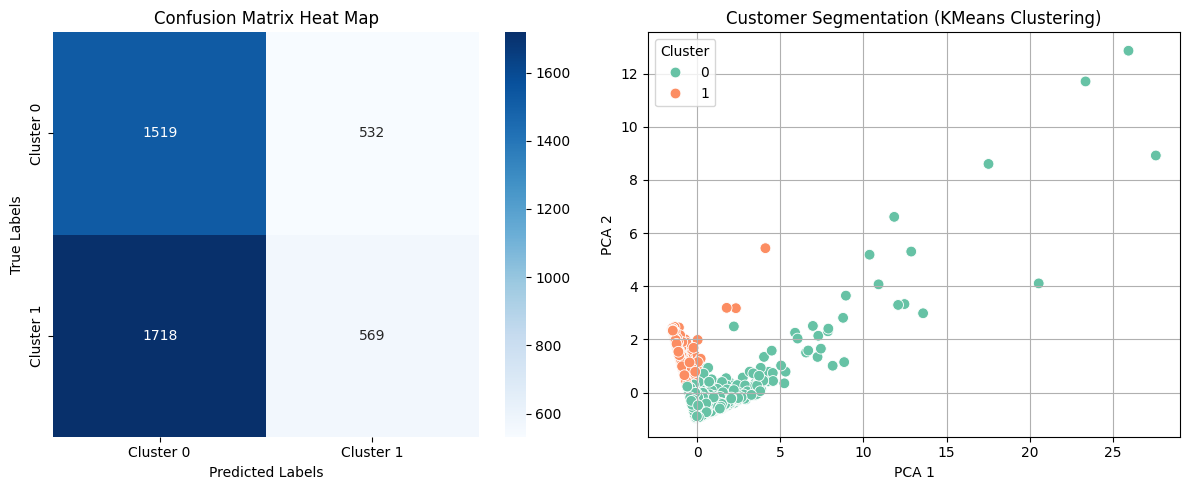

In [6]:
# Import necessary libraries
from google.colab import files
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Upload dataset
print("Please upload your dataset:")
uploaded = files.upload()  # For file upload in Google Colab
file_name = list(uploaded.keys())[0]

# Step 2: Load and preprocess the data
df = pd.read_csv(file_name)
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df = df.dropna(subset=["CustomerID"])
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

# Create RFM Features
ref_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)
rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (ref_date - x.max()).days,
    "InvoiceNo": "nunique",
    "TotalPrice": "sum"
}).reset_index()
rfm.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]

# Normalize RFM data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[["Recency", "Frequency", "Monetary"]])

# Step 3: Perform Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
rfm["Cluster"] = kmeans.fit_predict(rfm_scaled)

# Evaluation Metrics
silhouette = silhouette_score(rfm_scaled, rfm["Cluster"])
db_index = davies_bouldin_score(rfm_scaled, rfm["Cluster"])
inertia = kmeans.inertia_

print("\n🧪 Clustering Evaluation Metrics:")
print(f"Silhouette Score: {silhouette:.3f}")
print(f"Davies-Bouldin Index: {db_index:.3f}")
print(f"Inertia: {inertia:.2f}")

# PCA for visualization
pca = PCA(n_components=2)
pca_vals = pca.fit_transform(rfm_scaled)
rfm["PCA1"] = pca_vals[:, 0]
rfm["PCA2"] = pca_vals[:, 1]

# Dummy labels for evaluation (replace with actual ground truth labels if available)
true_labels = np.random.choice([0, 1], size=len(rfm["Cluster"]))  # Replace this with actual labels
pred_labels = rfm["Cluster"]

# Classification Metrics
accuracy = accuracy_score(true_labels, pred_labels)
precision = precision_score(true_labels, pred_labels, average='weighted')
recall = recall_score(true_labels, pred_labels, average='weighted')

print("\n📊 Classification Metrics:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")

# Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)

# Step 4: Plot Confusion Matrix and Clustering Diagram
plt.figure(figsize=(12, 5))

# Subplot 1: Confusion Matrix Heat Map
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Cluster 0", "Cluster 1"], yticklabels=["Cluster 0", "Cluster 1"])
plt.title("Confusion Matrix Heat Map")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Subplot 2: PCA Cluster Diagram
plt.subplot(1, 2, 2)
sns.scatterplot(data=rfm, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", s=60)
plt.title("Customer Segmentation (KMeans Clustering)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.grid(True)

plt.tight_layout()
plt.show()
